<a href="https://colab.research.google.com/github/JairAlbertoHuertaDiaz45/Simulaci-n-II/blob/main/MuestreoImportancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Huerta Díaz Jair Alberto**

Reducción de la Varianza por Muestreo importancia

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import time

In [165]:
def f(x):
    """Función a integrar"""
    return np.cos((np.pi * x) / 2)
def g(x):
    """Función de densidad g(x) propuesta"""
    c = 24 / (24 - np.pi ** 2)
    return c * (1 - (np.pi ** 2 * x ** 2) / 8)

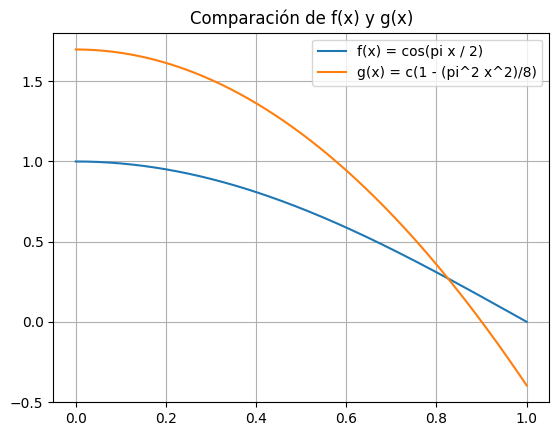

In [166]:
xx = np.linspace(0, 1, 200)
plt.plot(xx, f(xx), label='f(x) = cos(pi x / 2)')
plt.plot(xx, g(xx), label='g(x) = c(1 - (pi^2 x^2)/8)')
plt.title("Comparación de f(x) y g(x)")
plt.legend()
plt.grid()
plt.show()

In [167]:
def muestra_g(n):
    """
    Genera muestras usando el método de aceptación y rechazo.
    """
    c = 24 / (24 - np.pi ** 2)
    lista = []
    while len(lista) < n:
        u = rd.random()       # valor uniforme en [0,1] para x
        w = rd.uniform(0, c)  # valor uniforme en [0,c] para decidir aceptación
        if w <= g(u):
            lista.append(u)
    return lista

In [168]:
def mc_crudo(N, n, func=f, a=0.0, b=1.0):
    """Estimación Monte Carlo directa (cruda)"""
    thetas = []
    t0 = time.perf_counter()
    for _ in range(n):
        xs = np.random.uniform(a, b, N)
        valores = func(xs)
        theta = (b - a) * np.mean(valores)
        thetas.append(theta)
    t1 = time.perf_counter()
    return np.mean(thetas), np.var(thetas, ddof=1), (t1 - t0)/n

In [169]:
def mc_importancia(N, n):
    """Estimación usando muestreo por importancia"""
    thetas = []
    t0 = time.perf_counter()
    for _ in range(n):
        X = muestra_g(N)
        valores = [f(xi) / g(xi) for xi in X]
        thetas.append(np.mean(valores))
    t1 = time.perf_counter()
    return np.mean(thetas), np.var(thetas, ddof=1), (t1 - t0)/n

In [170]:
N = 1000  # muestras por réplica
n = 200   # número de repeticiones

mean_crudo, var_crudo, tiempo_crudo = mc_crudo(N, n)
mean_import, var_import, tiempo_import = mc_importancia(N, n)

In [171]:
reduccion = ((var_crudo - var_import) / var_crudo) * 100

print("Monte Carlo crudo:                media =", round(mean_crudo,6),
      " varianza =", round(var_crudo,8), " tiempo =", round(tiempo_crudo,6))
print("Monte Carlo con importancia:      media =", round(mean_import,6),
      " varianza =", round(var_import,8), " tiempo =", round(tiempo_import,6))
print("Reducción relativa de varianza:  ", round(reduccion,2), "%")

Monte Carlo crudo:                media = 0.637798  varianza = 9.839e-05  tiempo = 5.2e-05
Monte Carlo con importancia:      media = 0.616482  varianza = 1.917e-05  tiempo = 0.003371
Reducción relativa de varianza:   80.52 %


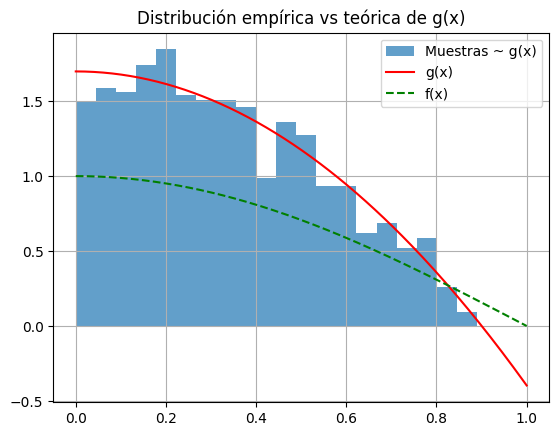

In [172]:
M = muestra_g(2000)
plt.hist(M, bins=20, density=True, alpha=0.7, label='Muestras ~ g(x)')
plt.plot(xx, g(xx), 'r', label='g(x)')
plt.plot(xx, f(xx), 'g--', label='f(x)')
plt.title("Distribución empírica vs teórica de g(x)")
plt.legend()
plt.grid()
plt.show()